In [ ]:
import pandas as StkMakTwt_ss

StkMakTwt_Dataset = StkMakTwt_ss.read_csv('/stock_tweets_updated.csv')
StkMakTwt_Dataset.shape

(1286, 2)

In [ ]:
StkMakTwt_Dataset.head(n=10) #head contents

,text,sentiment
0,robertbeadles yo enter win monarch tokens us s...,2
1,srilanka surcharge fuel removed surcharge rs i...,0
2,net issuance increases fund fiscal programs gt...,2
3,bentboolean much amazons traffic served fastly...,2
4,amd ryzen desktop cpus looking great track lau...,2
5,quanttrend reduce portfolio risk gold perfect ...,2
6,million sales expected spirit aerosystems hold...,2
7,arjunkharpal apple cut prices iphone range chi...,0
8,smaalpha cdc us new case data day lag saw anot...,0
9,look dependable dividends read gt httpstcoqkvn...,1


**sentiment**
positive	denotes - 2
neutral	denotes - 1
negative	denotes - 0


In [ ]:
StkMakTwt_Dataset['sentiment'].value_counts()

,count
sentiment,
2,523
1,421
0,342


Hence positive stock tweets are more.

In [ ]:
# Download required NLTK resources

import nltk as TwtNltk
TwtNltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Text Preprocessing: Tokenization + Stemming
# =========================

from nltk.stem import PorterStemmer as TwtStemmer
from nltk.tokenize import word_tokenize as TwtToken

# flag to control printing only once
Twt_DebugOnce = True

def Twt_TokenStem_Process(txt_inp):
    global Twt_DebugOnce

    #  Convert to lowercase string
    Twt_txt_lower = str(txt_inp).lower()

    #  Tokenize first (split text into words)
    Twt_tokens = TwtToken(Twt_txt_lower)

    #  Initialize stemmer
    Twt_ps = TwtStemmer()

    #  Apply stemming on each token
    Twt_stemmed_tokens = [Twt_ps.stem(word) for word in Twt_tokens]

    #  Join stemmed tokens back into a single string
    Twt_final_text = " ".join(Twt_stemmed_tokens)

    # Debug print only for the first record
    if Twt_DebugOnce:
        print("* Original Lower Text:", Twt_txt_lower)
        print("* After Tokenization:", Twt_tokens)
        print("* After Stemming:", Twt_stemmed_tokens)
        print("* Final Processed Text:", Twt_final_text)
        Twt_DebugOnce = False  # Disable further prints

    # Return cleaned text
    return Twt_final_text

StkMakTwt_Dataset['text'] = StkMakTwt_Dataset['text'].apply(Twt_TokenStem_Process)
StkMakTwt_Dataset['text']


* Original Lower Text: robertbeadles yo enter win monarch tokens us stock market crashes amp learn pt retweet watch video
* After Tokenization: ['robertbeadles', 'yo', 'enter', 'win', 'monarch', 'tokens', 'us', 'stock', 'market', 'crashes', 'amp', 'learn', 'pt', 'retweet', 'watch', 'video']
* After Stemming: ['robertbeadl', 'yo', 'enter', 'win', 'monarch', 'token', 'us', 'stock', 'market', 'crash', 'amp', 'learn', 'pt', 'retweet', 'watch', 'video']
* Final Processed Text: robertbeadl yo enter win monarch token us stock market crash amp learn pt retweet watch video


,text
0,robertbeadl yo enter win monarch token us stoc...
1,srilanka surcharg fuel remov surcharg rs impos...
2,net issuanc increas fund fiscal program gt yie...
3,bentboolean much amazon traffic serv fastli he...
4,amd ryzen desktop cpu look great track launch ...
...,...
1281,stock back recoveri room httpstcohvvlwwodu fai...
1282,macrochart breadth expand last week discuss ha...
1283,mawsonresourc rompasrajapalot big new camp raj...
1284,aapl qqq top may httpstcoinkwbtxu


In [ ]:
#  Feature Extraction (TF-IDF)
# =========================

from sklearn.feature_extraction.text import TfidfVectorizer as TwtVect_TFIDF

Twt_Vectori = TwtVect_TFIDF()
Twt_FeatureX = Twt_Vectori.fit_transform(StkMakTwt_Dataset['text']).toarray()
Twt_FeatureX.shape

(1286, 5782)

In [ ]:
Twt_LabelY = StkMakTwt_Dataset['sentiment']
Twt_LabelY.shape

(1286,)

In [ ]:
# Train-Test Split
# =========================

from sklearn.model_selection import train_test_split as TwtDataSplit
TwtX_tin_StkMak, TwtX_sin_StkMakt, TwtY_tout_StkMak, TwtY_sout_StkMak = TwtDataSplit(Twt_FeatureX, Twt_LabelY, test_size=0.2, random_state=42, stratify=Twt_LabelY)

In [ ]:
#train , test input & output data
TwtX_tin_StkMak.shape, TwtX_sin_StkMakt.shape, TwtY_tout_StkMak.shape, TwtY_sout_StkMak.shape

((1028, 5782), (258, 5782), (1028,), (258,))

#***I. Without hypertuning***

**Random Forest implementation**

In [ ]:
#  Random Forest (RF) Model
# =========================

from sklearn.ensemble import RandomForestClassifier as TwtRndForest
import time as TwtClock

TwtRF_Start = TwtClock.time()
Twt_RF__StkMak = TwtRndForest()
Twt_RF__StkMak.fit(TwtX_tin_StkMak, TwtY_tout_StkMak)
TwtRF_Time = TwtClock.time() - TwtRF_Start

# Predictions
Twt_RF_Pred_StkMak = Twt_RF__StkMak.predict(TwtX_sin_StkMakt)
Twt_RF_Prob_StkMak = Twt_RF__StkMak.predict_proba(TwtX_sin_StkMakt)

In [ ]:
# Evaluation Function
# =========================

from sklearn.metrics import accuracy_score as Twt_Acc, precision_score as Twt_Prec, recall_score as Twt_Rec, f1_score as Twt_F1, roc_auc_score as Twt_AUC, confusion_matrix as Twt_CM
import numpy as NumStkMakTwt
import matplotlib.pyplot as MkTwtVis
import seaborn as TwtSeaVis

def Twt_ModelEval(Y_true_StkMak, Y_pred_StkMak, Y_prob_StkMak, Twt_ModelName, Twt_ExeTime):
    TwtAcc = Twt_Acc(Y_true_StkMak, Y_pred_StkMak)
    TwtPrec = Twt_Prec(Y_true_StkMak, Y_pred_StkMak, average='weighted')
    TwtRec = Twt_Rec(Y_true_StkMak, Y_pred_StkMak, average='weighted')
    TwtF1 = Twt_F1(Y_true_StkMak, Y_pred_StkMak, average='weighted')

    try:
        TwtAUC = Twt_AUC(Y_true_StkMak, Y_prob_StkMak, multi_class='ovr')
    except ValueError:
        TwtAUC = NumStkMakTwt.nan


    print(f"\n{Twt_ModelName} Performance Metrics:")
    print(f"Accuracy  : {TwtAcc:.3f}")
    print(f"Precision : {TwtPrec:.3f}")
    print(f"Recall    : {TwtRec:.3f}")
    print(f"F1-score  : {TwtF1:.3f}")
    print(f"AUC       : {TwtAUC:.3f}")
    print(f"Execution Time: {Twt_ExeTime:.2f} sec")

    Twt_ConfMat = Twt_CM(Y_true_StkMak, Y_pred_StkMak)
    Twt_Lbls = ['Negative (0)', 'Neutral (1)', 'Positive (2)']

    TwtSeaVis.heatmap(Twt_ConfMat, annot=True, fmt='d', cmap='Blues',
                      xticklabels=Twt_Lbls, yticklabels=Twt_Lbls)
    MkTwtVis.title(f'{Twt_ModelName} - Confusion Matrix')
    MkTwtVis.xlabel('Predicted Sentiment')
    MkTwtVis.ylabel('Actual Sentiment')
    MkTwtVis.show()

    return [Twt_ModelName, TwtAcc, TwtPrec, TwtRec, TwtF1, TwtAUC, Twt_ExeTime]


Random Forest (RF) Performance Metrics:
Accuracy  : 0.527
Precision : 0.546
Recall    : 0.527
F1-score  : 0.520
AUC       : 0.714
Execution Time: 2.54 sec


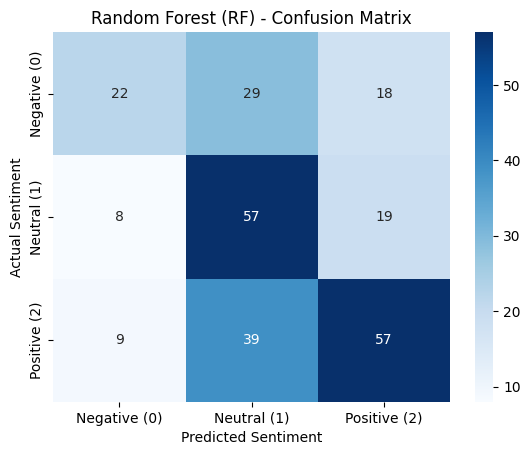

In [ ]:
# Evaluate RF models
TwtRF_Res = Twt_ModelEval(TwtY_sout_StkMak, Twt_RF_Pred_StkMak, Twt_RF_Prob_StkMak, "Random Forest (RF)", TwtRF_Time)

**Weighted Random Forest implementation**

In [ ]:
#  Weighted Random Forest (WRF) Model
# =========================
from sklearn.utils.class_weight import compute_class_weight as Twt_WeightCalc
import time as TwtClock
import numpy as NumStkMakTwt

Twt_ClassWeights_StkMak = Twt_WeightCalc('balanced', classes=NumStkMakTwt.unique(TwtY_tout_StkMak), y=TwtY_tout_StkMak)
Twt_ClassWeight_Dict_StkMak = {i: Twt_ClassWeights_StkMak[i] for i in range(len(Twt_ClassWeights_StkMak))}
print("Computed Class Weights:", Twt_ClassWeight_Dict_StkMak)

TwtWRF_Start = TwtClock.time()
Twt_WRF_Model = TwtRndForest(class_weight=Twt_ClassWeight_Dict_StkMak)
Twt_WRF_Model.fit(TwtX_tin_StkMak, TwtY_tout_StkMak)
TwtWRF_Time = TwtClock.time() - TwtWRF_Start

# Predictions
Twt_WRF_Pred_StkMak = Twt_WRF_Model.predict(TwtX_sin_StkMakt)
Twt_WRF_Prob_StkMak = Twt_WRF_Model.predict_proba(TwtX_sin_StkMakt)

Computed Class Weights: {0: np.float64(1.2551892551892552), 1: np.float64(1.0168150346191889), 2: np.float64(0.8197767145135566)}



Weighted Random Forest (WRF) Performance Metrics:
Accuracy  : 0.512
Precision : 0.542
Recall    : 0.512
F1-score  : 0.505
AUC       : 0.702
Execution Time: 3.37 sec


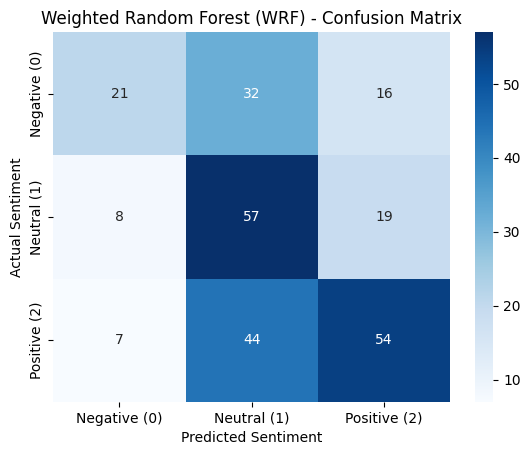

In [ ]:
# Evaluate WRF models

TwtWRF_Res = Twt_ModelEval(TwtY_sout_StkMak, Twt_WRF_Pred_StkMak, Twt_WRF_Prob_StkMak, "Weighted Random Forest (WRF)", TwtWRF_Time)


In [ ]:
#  Model Comparison
# =========================

Twt_ModelCompare = StkMakTwt_ss.DataFrame([TwtRF_Res, TwtWRF_Res],
                                   columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC", "Execution Time (sec)"])

print("\n=== Model Comparison Summary ===")
print(Twt_ModelCompare)


=== Model Comparison Summary ===
                          Model  Accuracy  Precision    Recall  F1-score  \
0            Random Forest (RF)  0.527132   0.546114  0.527132  0.519690   
1  Weighted Random Forest (WRF)  0.511628   0.542472  0.511628  0.504584   

        AUC  Execution Time (sec)  
0  0.714321              2.544847  
1  0.701944              3.372903  


#***II. With hypertuning***

In [ ]:
#  Finding best hyperparameters with Grid Search
# =========================

from sklearn.model_selection import GridSearchCV as Twt_GridSrch

# Define parameter grid for tuning
Twt_ParamGrid = {
    'n_estimators': [100, 50, 150],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5],
    'bootstrap': [True, False]
}

Twt_RF_Base = TwtRndForest()

# Apply Grid Search with 2-fold CV
Twt_GridSrch_RF = Twt_GridSrch(estimator=Twt_RF_Base,
                                param_grid=Twt_ParamGrid,
                                cv=2,
                                n_jobs=-1,
                                verbose=2,
                                scoring='accuracy')

Twt_GridSrch_RF.fit(TwtX_tin_StkMak, TwtY_tout_StkMak)

# Get best parameters
print("\n @@ Best Hyperparameters found by Grid Search:")
print(Twt_GridSrch_RF.best_params_)

Fitting 2 folds for each of 480 candidates, totalling 960 fits

 @@ Best Hyperparameters found by Grid Search:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


**Random Forest implementation**


Random Forest (RF) Performance Metrics:
Accuracy  : 0.523
Precision : 0.523
Recall    : 0.523
F1-score  : 0.521
AUC       : 0.694
Execution Time: 1.94 sec


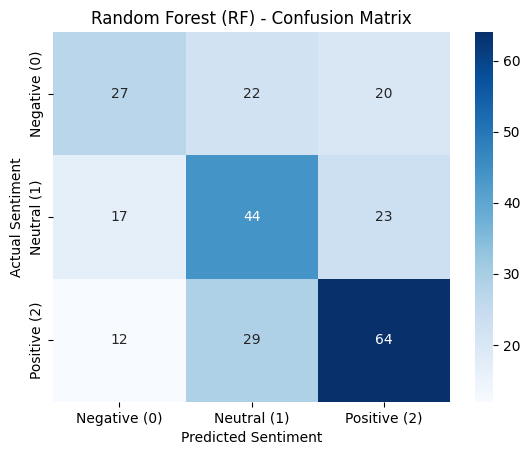

In [ ]:
#  Random Forest (RF) Model with Grid Search
# =========================

TwtRF_Start = TwtClock.time()
Twt_RF__StkMak = TwtRndForest(**Twt_GridSrch_RF.best_params_)
Twt_RF__StkMak.fit(TwtX_tin_StkMak, TwtY_tout_StkMak)
TwtRF_Time = TwtClock.time() - TwtRF_Start

# Predictions
Twt_RF_Pred_StkMak = Twt_RF__StkMak.predict(TwtX_sin_StkMakt)
Twt_RF_Prob_StkMak = Twt_RF__StkMak.predict_proba(TwtX_sin_StkMakt)

# Evaluate RF models
TwtRF_Res = Twt_ModelEval(TwtY_sout_StkMak, Twt_RF_Pred_StkMak, Twt_RF_Prob_StkMak, "Random Forest (RF)", TwtRF_Time)

**Weighted Random Forest implementation**

Computed Class Weights: {0: np.float64(1.2551892551892552), 1: np.float64(1.0168150346191889), 2: np.float64(0.8197767145135566)}

Weighted Random Forest (WRF) Performance Metrics:
Accuracy  : 0.535
Precision : 0.564
Recall    : 0.535
F1-score  : 0.539
AUC       : 0.692
Execution Time: 2.13 sec


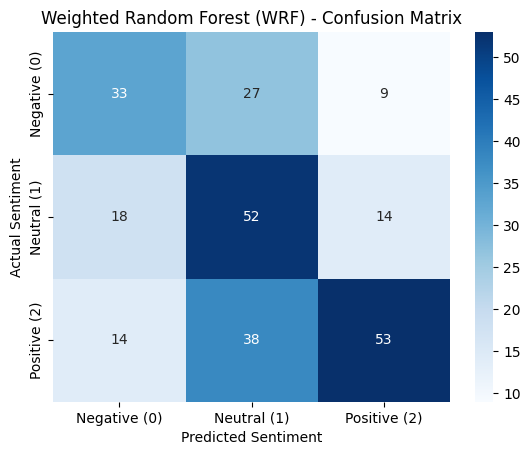

In [ ]:
#  Weighted Random Forest (WRF) Model with Grid Search
# =========================

Twt_ClassWeights_StkMak = Twt_WeightCalc('balanced', classes=NumStkMakTwt.unique(TwtY_tout_StkMak), y=TwtY_tout_StkMak)
Twt_ClassWeight_Dict_StkMak = {i: Twt_ClassWeights_StkMak[i] for i in range(len(Twt_ClassWeights_StkMak))}
print("Computed Class Weights:", Twt_ClassWeight_Dict_StkMak)

TwtWRF_Start = TwtClock.time()
Twt_WRF_Model = TwtRndForest(**Twt_GridSrch_RF.best_params_, class_weight=Twt_ClassWeight_Dict_StkMak)
Twt_WRF_Model.fit(TwtX_tin_StkMak, TwtY_tout_StkMak)
TwtWRF_Time = TwtClock.time() - TwtWRF_Start

# Predictions
Twt_WRF_Pred_StkMak = Twt_WRF_Model.predict(TwtX_sin_StkMakt)
Twt_WRF_Prob_StkMak = Twt_WRF_Model.predict_proba(TwtX_sin_StkMakt)

# Evaluate WRF models
TwtWRF_Res = Twt_ModelEval(TwtY_sout_StkMak, Twt_WRF_Pred_StkMak, Twt_WRF_Prob_StkMak, "Weighted Random Forest (WRF)", TwtWRF_Time)


In [ ]:
#  Model Comparison
# =========================

Twt_ModelCompare = StkMakTwt_ss.DataFrame([TwtRF_Res, TwtWRF_Res],
                                   columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC", "Execution Time (sec)"])

print("\n=== Model Comparison Summary ===")
print(Twt_ModelCompare)


=== Model Comparison Summary ===
                          Model  Accuracy  Precision    Recall  F1-score  \
0            Random Forest (RF)  0.523256   0.523166  0.523256  0.521319   
1  Weighted Random Forest (WRF)  0.534884   0.564294  0.534884  0.538525   

        AUC  Execution Time (sec)  
0  0.694005              1.940939  
1  0.692002              2.126931  


**Artificial Neural Network (ANN)**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
33/33 - 11s - 330ms/step - accuracy: 0.4037 - loss: 1.3886 - val_accuracy: 0.4070 - val_loss: 1.2194 - learning_rate: 1.0000e-03
Epoch 2/100
33/33 - 3s - 77ms/step - accuracy: 0.4426 - loss: 1.1290 - val_accuracy: 0.4884 - val_loss: 1.1268 - learning_rate: 1.0000e-03
Epoch 3/100
33/33 - 3s - 85ms/step - accuracy: 0.7646 - loss: 0.7466 - val_accuracy: 0.5465 - val_loss: 1.2005 - learning_rate: 1.0000e-03
Epoch 4/100
33/33 - 2s - 63ms/step - accuracy: 0.9621 - loss: 0.3286 - val_accuracy: 0.5504 - val_loss: 1.5112 - learning_rate: 1.0000e-03
Epoch 5/100
33/33 - 3s - 88ms/step - accuracy: 0.9893 - loss: 0.2149 - val_accuracy: 0.5465 - val_loss: 1.5648 - learning_rate: 1.0000e-03
Epoch 6/100
33/33 - 4s - 130ms/step - accuracy: 0.9932 - loss: 0.1823 - val_accuracy: 0.5465 - val_loss: 1.7255 - learning_rate: 1.0000e-03
Epoch 7/100
33/33 - 1s - 38ms/step - accuracy: 0.9951 - loss: 0.1710 - val_accuracy: 0.5465 - val_loss: 1.6353 - learning_rate: 1.0000e-03
Epoch 8/100
33/33 - 1s -

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


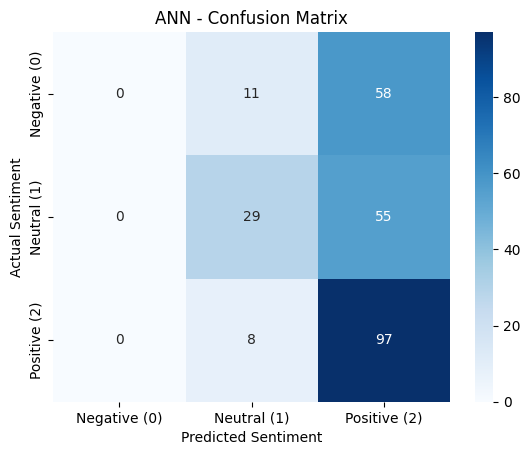


=== ANN Model Comparison Summary ===
  Model  Accuracy  Precision    Recall  F1-score       AUC  \
0   ANN  0.488372    0.38469  0.488372  0.393704  0.718032   

   Execution Time (sec)  
0            132.374455  


In [ ]:
# *** Artificial Neural Network (ANN)***
# =====================================================

import tensorflow as TwtTF
from tensorflow.keras.models import Sequential as TwtSeqModel
from tensorflow.keras.layers import Dense as TwtDense, Dropout as TwtDrop
from tensorflow.keras.callbacks import EarlyStopping as TwtEarlyStop, ReduceLROnPlateau as TwtLRReduce
import time as TwtClock

# Build hypertuned ANN
Twt_ANN_Model = TwtSeqModel()
Twt_ANN_Model.add(TwtDense(256, activation='relu', input_shape=(TwtX_tin_StkMak.shape[1],),
                           kernel_regularizer=TwtTF.keras.regularizers.l2(0.001)))
Twt_ANN_Model.add(TwtDrop(0.4))
Twt_ANN_Model.add(TwtDense(128, activation='relu', kernel_regularizer=TwtTF.keras.regularizers.l2(0.001)))
Twt_ANN_Model.add(TwtDrop(0.3))
Twt_ANN_Model.add(TwtDense(64, activation='relu'))
Twt_ANN_Model.add(TwtDrop(0.2))
Twt_ANN_Model.add(TwtDense(3, activation='softmax'))

# Compile with tuned optimizer
Twt_ANN_Model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=TwtTF.keras.optimizers.Adam(learning_rate=1e-3),
                      metrics=['accuracy'])

# Callbacks for hypertuning
Twt_callbacks = [
    TwtEarlyStop(monitor='val_loss', patience=100, restore_best_weights=True),
    TwtLRReduce(monitor='val_loss', factor=0.5, patience=100, min_lr=1e-5)
]

# Train hypertuned ANN
TwtANN_Start = TwtClock.time()
Twt_ANN_History = Twt_ANN_Model.fit(TwtX_tin_StkMak, TwtY_tout_StkMak,
                                    validation_data=(TwtX_sin_StkMakt, TwtY_sout_StkMak),
                                    epochs=100,
                                    batch_size=32,
                                    callbacks=Twt_callbacks,
                                    verbose=2)
TwtANN_Time = TwtClock.time() - TwtANN_Start

# Predictions
Twt_ANN_Pred_Prob = Twt_ANN_Model.predict(TwtX_sin_StkMakt)
Twt_ANN_Pred_Label = TwtTF.argmax(Twt_ANN_Pred_Prob, axis=1)

# Evaluate ANN
TwtANN_Res = Twt_ModelEval(TwtY_sout_StkMak, Twt_ANN_Pred_Label, Twt_ANN_Pred_Prob,
                           "ANN", TwtANN_Time)

# Add to comparison
Twt_ModelCompare = StkMakTwt_ss.DataFrame([TwtANN_Res],
                                   columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC", "Execution Time (sec)"])
print("\n=== ANN Model Comparison Summary ===")
print(Twt_ModelCompare)
